Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [67]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [68]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [69]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [70]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [71]:
# checking the number of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [72]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorical Data

In [81]:
# encoding "Fuel_Type" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "owner" Column
car_dataset.replace({'owner':{'Test Drive Car':0,'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4}},inplace=True)

/tmp/ipython-input-1463577264.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'owner':{'Test Drive Car':0,'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4}},inplace=True)


In [82]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,2


Splitting the data and Target

In [83]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [84]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      1
1     2007      50000     0            1             0      1
2     2012     100000     1            1             0      1
3     2017      46000     0            1             0      1
4     2014     141000     1            1             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      2
4336  2014      80000     1            1             0      2
4337  2009      83000     0            1             0      2
4338  2016      90000     1            1             0      1
4339  2016      40000     0            1             0      1

[4340 rows x 6 columns]


In [85]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Training and Test data

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [87]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [88]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [89]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [90]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4281537850306607


Visualize the actual prices and Predicted prices

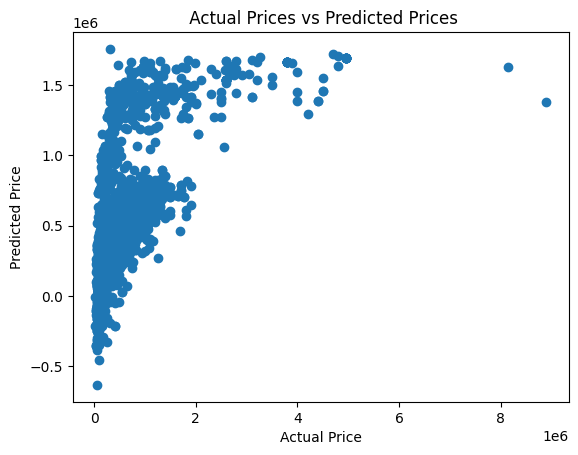

In [91]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [92]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [52]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.504347138272798


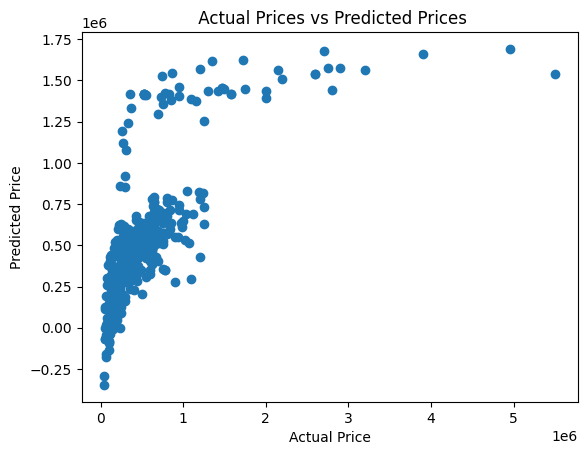

In [53]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [54]:
# loading the linear regression model
lass_reg_model = Lasso()

In [55]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [56]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [57]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42815378497533607


Visualize the actual prices and Predicted prices

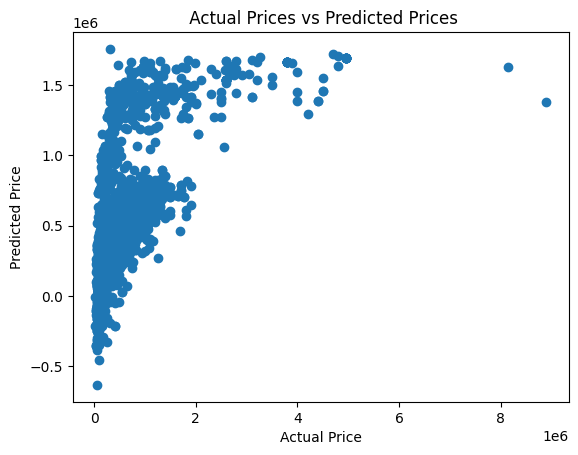

In [58]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [59]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [60]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5043465776668168


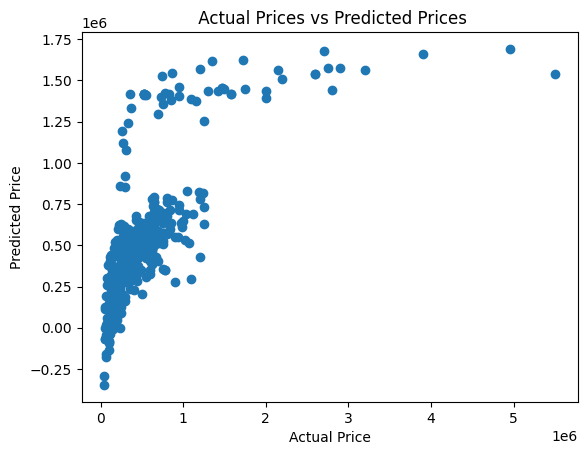

In [61]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()